In [1]:
import pandas as pd
import numpy as np

In [36]:
df=pd.read_csv("D://DATASETS//Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
df.shape

(10000, 14)

In [38]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [39]:
df.duplicated().sum()

0

In [40]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [41]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [42]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [44]:
df.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False


In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['Exited']),df['Exited'],test_size=0.2,random_state=56)

In [47]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [58]:
X_train_scaled

array([[-0.57895174, -0.66081395,  1.02707569, ...,  1.72744428,
        -0.57427105,  0.91140749],
       [ 0.5562351 ,  0.48458894, -1.73248956, ..., -0.57888987,
         1.74133801,  0.91140749],
       [ 1.41278517, -0.66081395, -0.35270693, ..., -0.57888987,
        -0.57427105,  0.91140749],
       ...,
       [ 0.89679115, -0.37446323, -0.00776128, ..., -0.57888987,
        -0.57427105,  0.91140749],
       [-0.36223425,  2.58449425, -1.3875439 , ..., -0.57888987,
        -0.57427105, -1.09720406],
       [ 1.8152605 ,  2.0117928 , -1.04259825, ..., -0.57888987,
        -0.57427105, -1.09720406]])

In [63]:
X_train.shape

(8000, 11)

In [61]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [75]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))#hidden laer has only 11 nodes with relu activation function and 11 as no of input variable
model.add(Dense(11,activation='relu'))#second hidden layer
model.add(Dense(1,activation='sigmoid'))#output layer has only one node with sigmoid activation function

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [97]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8592 - loss: 0.3532 - val_accuracy: 0.8425 - val_loss: 0.3598
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8533 - loss: 0.3553 - val_accuracy: 0.8419 - val_loss: 0.3588
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8527 - loss: 0.3636 - val_accuracy: 0.8444 - val_loss: 0.3581
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8661 - loss: 0.3308 - val_accuracy: 0.8475 - val_loss: 0.3567
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.8692 - loss: 0.3290 - val_accuracy: 0.8438 - val_loss: 0.3578
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.8676 - loss: 0.3309 - val_accuracy: 0.8469 - val_loss: 0.3560
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.8611 - loss: 0.3347 - val_accuracy: 0.8494 - val_loss: 0.3566
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.8626 - loss: 0.3414 -

In [98]:
model.layers[0].get_weights()

[array([[ 0.11613021,  0.03207593,  0.00446695,  0.0749737 ,  0.03311106,
          0.38070035, -0.02348251,  0.11877504,  0.1937061 ,  0.07604385,
         -0.1946344 ],
        [-0.18243614, -0.90436894,  0.6667072 , -0.4056619 , -0.6386328 ,
          0.21866247,  0.34261364, -0.7941537 ,  0.6284128 ,  0.2156134 ,
         -0.9476129 ],
        [-0.15913475, -0.18888992, -0.09102268, -0.4768856 ,  0.04585816,
         -0.02753395,  0.09648407,  0.02673898,  0.39204708,  0.17250352,
         -0.1530332 ],
        [-0.77912855, -0.18160419, -0.16562617, -0.01871617, -0.19313395,
         -0.12699038, -0.21231657, -0.21146855, -0.7518139 , -0.1917933 ,
         -0.15076806],
        [-1.0776507 , -0.09744097,  0.5337895 ,  1.0369853 ,  0.11675175,
         -0.166406  , -0.1018993 ,  0.00822241, -0.17413232,  1.2162415 ,
         -0.34780574],
        [ 0.02331734,  0.3502661 , -0.2930366 ,  0.01772955, -0.015738  ,
         -0.67050636, -0.12626567,  0.0175344 ,  0.48633796,  0.1178903

In [99]:
model.layers[1].get_weights()

[array([[ 4.09204811e-01, -4.23032194e-01, -3.62224430e-01,
         -1.42908180e+00, -9.10210431e-01, -1.40544072e-01,
         -2.81566024e-01, -1.22211523e-01, -8.28565583e-02,
          1.82840914e-01,  6.91669881e-01],
        [-6.88866675e-01,  3.47966313e-01,  2.63294011e-01,
         -8.98417493e-05, -1.70254499e-01,  1.54470757e-01,
         -4.71008331e-01, -8.19046497e-02,  1.83745816e-01,
         -3.72019857e-01, -4.10991728e-01],
        [-8.35368156e-01, -2.37029806e-01,  1.27024427e-01,
          4.27374572e-01,  5.51530898e-01,  1.99524984e-01,
          5.85995503e-02,  3.16453665e-01,  3.22990656e-01,
         -1.02686174e-01, -7.44693041e-01],
        [ 2.08308131e-01,  7.00993955e-01, -6.64948761e-01,
          5.08698940e-01, -8.71257931e-02, -1.40621364e-01,
          6.27541959e-01,  3.30686033e-01,  2.69267559e-01,
         -5.32816768e-01, -3.99274439e-01],
        [-8.55349004e-01,  2.76070595e-01,  5.04694879e-01,
          2.72396713e-01,  4.46135044e-01, -

In [100]:
model.layers[2].get_weights()

[array([[ 1.4422151 ],
        [-0.5305733 ],
        [ 0.95225513],
        [ 1.0645646 ],
        [-0.76251656],
        [ 1.2547526 ],
        [ 0.7966537 ],
        [ 1.2912457 ],
        [-0.63987267],
        [ 0.98599297],
        [ 0.5225313 ]], dtype=float32),
 array([-0.20939015], dtype=float32)]

In [101]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


In [102]:
y_pred=np.where(y_log>=0.5,1,0)

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.857

In [104]:
import matplotlib.pyplot as plt

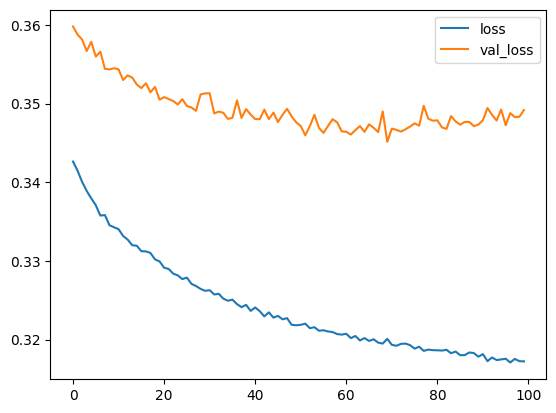

In [105]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

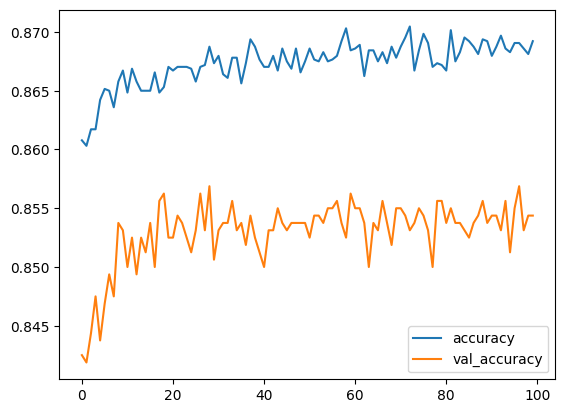

In [106]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()